Read Data

In [4]:
from scipy import stats as st
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#importing Dataset
dataset=pd.read_csv("kddcup.data_10_percent_corrected",names=[
"duration", 
"protocol_type", 
"service", 
"flag",
"src_bytes",
"dst_bytes",
"land", 
"wrong_fragment",
 "urgent",
 "hot",
"num_failed_logins",
"logged_in",
"num_compromised",
 "root_shell",
 "su_attempted",
 "num_root",
"num_file_creations",
"num_shells",
"num_access_files",
"num_outbound_cmds",
"is_host_login",
 "is_guest_login",
 "count", 
"srv_count",
"serror_rate",
"srv_serror_rate",
"rerror_rate",
"srv_rerror_rate",
"same_srv_rate",
"diff_srv_rate",
 "srv_diff_host_rate", 
"dst_host_count", 
"dst_host_srv_count",
"dst_host_same_srv_rate",
"dst_host_diff_srv_rate",
"dst_host_same_src_port_rate",
"dst_host_srv_diff_host_rate",
"dst_host_serror_rate",
"dst_host_srv_serror_rate",
"dst_host_rerror_rate",
"dst_host_srv_rerror_rate",
"label"
])

X=dataset.iloc[:, :-1].values
y=dataset.iloc[:,-1].values

dataset.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.00,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.0,0.0,0.0,0.0,normal.
5,0,tcp,http,SF,217,2032,0,0,0,0,...,59,1.0,0.0,0.02,0.00,0.0,0.0,0.0,0.0,normal.
6,0,tcp,http,SF,212,1940,0,0,0,0,...,69,1.0,0.0,1.00,0.04,0.0,0.0,0.0,0.0,normal.
7,0,tcp,http,SF,159,4087,0,0,0,0,...,79,1.0,0.0,0.09,0.04,0.0,0.0,0.0,0.0,normal.
8,0,tcp,http,SF,210,151,0,0,0,0,...,89,1.0,0.0,0.12,0.04,0.0,0.0,0.0,0.0,normal.
9,0,tcp,http,SF,212,786,0,0,0,1,...,99,1.0,0.0,0.12,0.05,0.0,0.0,0.0,0.0,normal.


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494021 non-null  int64  
 1   protocol_type                494021 non-null  object 
 2   service                      494021 non-null  object 
 3   flag                         494021 non-null  object 
 4   src_bytes                    494021 non-null  int64  
 5   dst_bytes                    494021 non-null  int64  
 6   land                         494021 non-null  int64  
 7   wrong_fragment               494021 non-null  int64  
 8   urgent                       494021 non-null  int64  
 9   hot                          494021 non-null  int64  
 10  num_failed_logins            494021 non-null  int64  
 11  logged_in                    494021 non-null  int64  
 12  num_compromised              494021 non-null  int64  
 13 

In [9]:
dataset.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,494021.000000,4.940210e+05,4.940210e+05,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,...,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000
mean,47.979302,3.025610e+03,8.685324e+02,0.000045,0.006433,0.000014,0.034519,0.000152,0.148247,0.010212,...,232.470778,188.665670,0.753780,0.030906,0.601935,0.006684,0.176754,0.176443,0.058118,0.057412
std,707.746472,9.882181e+05,3.304000e+04,0.006673,0.134805,0.005510,0.782103,0.015520,0.355345,1.798326,...,64.745380,106.040437,0.410781,0.109259,0.481309,0.042133,0.380593,0.380919,0.230590,0.230140
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,46.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Corelation Matrix

In [2]:
dataset.corr()

,0,4,5,6,7,8,9,10,11,12,...,31,32,33,34,35,36,37,38,39,40
0,1.000000,0.004258,0.005440,-0.000452,-0.003235,0.003786,0.013213,0.005239,-0.017265,0.058095,...,0.010074,-0.117515,-0.118458,0.406233,0.042642,-0.006983,-0.030400,-0.030612,0.006739,0.010465
4,0.004258,1.000000,-0.000002,-0.000020,-0.000139,-0.000005,0.004483,-0.000027,0.001701,0.000119,...,-0.001743,-0.003212,-0.002052,0.000578,-0.000724,0.001186,-0.000718,0.001122,-0.000393,0.001328
5,0.005440,-0.000002,1.000000,-0.000175,-0.001254,0.016288,0.004365,0.049330,0.047814,0.023298,...,-0.048869,-0.005850,0.007058,-0.005314,-0.020143,0.008707,-0.011334,-0.011235,-0.005000,-0.005471
6,-0.000452,-0.000020,-0.000175,1.000000,-0.000318,-0.000017,-0.000295,-0.000065,-0.002784,-0.000038,...,-0.023671,-0.011587,0.001984,-0.000333,0.003799,0.083320,0.012658,0.007795,-0.001511,-0.001665
7,-0.003235,-0.000139,-0.001254,-0.000318,1.000000,-0.000123,-0.002106,-0.000467,-0.019908,-0.000271,...,-0.005191,-0.058624,-0.054903,0.071857,-0.031803,0.012092,-0.019091,-0.022104,0.029774,-0.011904
8,0.003786,-0.000005,0.016288,-0.000017,-0.000123,1.000000,0.000356,0.141996,0.006164,0.014285,...,-0.007139,-0.004540,-0.003279,0.010536,-0.002002,-0.000408,-0.001194,-0.001191,-0.000648,-0.000641
9,0.013213,0.004483,0.004365,-0.000295,-0.002106,0.000356,1.000000,0.008740,0.105305,0.007348,...,-0.026366,-0.038730,-0.029117,0.001319,-0.052923,-0.004467,-0.019491,-0.020201,-0.006541,-0.007749
10,0.005239,-0.000027,0.049330,-0.000065,-0.000467,0.141996,0.008740,1.000000,-0.001145,0.006907,...,-0.025444,-0.015413,0.000507,0.001017,-0.009565,0.016001,-0.001945,-0.002453,0.024753,0.023584
11,-0.017265,0.001701,0.047814,-0.002784,-0.019908,0.006164,0.105305,-0.001145,1.000000,0.013612,...,-0.621029,0.119315,0.161070,-0.061151,-0.461558,0.140493,-0.190955,-0.191704,-0.090868,-0.087885
12,0.058095,0.000119,0.023298,-0.000038,-0.000271,0.014285,0.007348,0.006907,0.013612,1.000000,...,-0.008361,-0.004797,-0.002584,0.000359,-0.006715,0.000621,-0.001978,-0.001631,-0.000843,-0.000873


In [3]:
for el in dataset.corr().to_string():
    print(el, end="")

          0         4         5         6         7         8         9         10        11        12        13        14        15        16        17        18  19  20        21        22        23        24        25        26        27        28        29        30        31        32        33        34        35        36        37        38        39        40
0   1.000000  0.004258  0.005440 -0.000452 -0.003235  0.003786  0.013213  0.005239 -0.017265  0.058095  0.021340  0.055853  0.056766  0.074562 -0.000169  0.025661 NaN NaN  0.023424 -0.105153 -0.080250 -0.031416 -0.031378  0.012053  0.012106  0.021771  0.051800 -0.011790  0.010074 -0.117515 -0.118458  0.406233  0.042642 -0.006983 -0.030400 -0.030612  0.006739  0.010465
4   0.004258  1.000000 -0.000002 -0.000020 -0.000139 -0.000005  0.004483 -0.000027  0.001701  0.000119 -0.000022 -0.000010 -0.000010  0.000013  0.000005 -0.000052 NaN NaN -0.000082 -0.003098 -0.002501  0.001558  0.001114  0.000591  0.001379 -0.001860  0.0062

<AxesSubplot:>

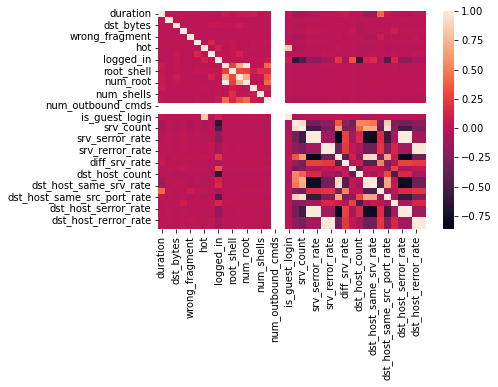

In [10]:
import seaborn as sn
sn.heatmap(dataset.corr())


Features informations

In [4]:
for i in range(X.shape[1]):
   print(f"Feature {i} unique values:")
   print( np.unique(X[:, i]))
   print("-------------------------------")

Feature 0 unique values:
[0 1 2 ... 42088 42448 58329]
-------------------------------
Feature 1 unique values:
['icmp' 'tcp' 'udp']
-------------------------------
Feature 2 unique values:
['IRC' 'X11' 'Z39_50' 'auth' 'bgp' 'courier' 'csnet_ns' 'ctf' 'daytime'
 'discard' 'domain' 'domain_u' 'echo' 'eco_i' 'ecr_i' 'efs' 'exec'
 'finger' 'ftp' 'ftp_data' 'gopher' 'hostnames' 'http' 'http_443' 'imap4'
 'iso_tsap' 'klogin' 'kshell' 'ldap' 'link' 'login' 'mtp' 'name'
 'netbios_dgm' 'netbios_ns' 'netbios_ssn' 'netstat' 'nnsp' 'nntp' 'ntp_u'
 'other' 'pm_dump' 'pop_2' 'pop_3' 'printer' 'private' 'red_i'
 'remote_job' 'rje' 'shell' 'smtp' 'sql_net' 'ssh' 'sunrpc' 'supdup'
 'systat' 'telnet' 'tftp_u' 'tim_i' 'time' 'urh_i' 'urp_i' 'uucp'
 'uucp_path' 'vmnet' 'whois']
-------------------------------
Feature 3 unique values:
['OTH' 'REJ' 'RSTO' 'RSTOS0' 'RSTR' 'S0' 'S1' 'S2' 'S3' 'SF' 'SH']
-------------------------------
Feature 4 unique values:
[0 1 4 ... 5133877 5135678 693375640]
-----------

In [5]:
for i in range(X.shape[1]):
    if (i ==1) or (i ==2) or (i ==3):
        continue
    cur_min=X[:, i].min()
    cur_max=X[:, i].max()
    cur_mean=X[:, i].mean()
    cur_median=np.median(X[:, i])
    cur_mode=st.mode( X[:, i])[0][0]
    cur_q1=np.quantile( X[:, i], 0.25)
    cur_q3=np.quantile( X[:, i], 0.75)
    print(f"Feature nom:{i}, min:{cur_min}, mean:{cur_mean}, max:{cur_max}, median:{cur_median}, mode:{cur_mode}, 1st quantile:{cur_q1}, 3rd quantile:{cur_q3}")



Feature nom:0, min:0, mean:47.97930249928647, max:58329, median:0.0, mode:0, 1st quantile:0.0, 3rd quantile:0.0
Feature nom:4, min:0, mean:3025.6102959185946, max:693375640, median:520.0, mode:1032, 1st quantile:45.0, 3rd quantile:1032.0
Feature nom:5, min:0, mean:868.5324247349809, max:5155468, median:0.0, mode:0, 1st quantile:0.0, 3rd quantile:0.0
Feature nom:6, min:0, mean:4.453251987263699e-05, max:1, median:0.0, mode:0, 1st quantile:0.0, 3rd quantile:0.0
Feature nom:7, min:0, mean:0.0064329249161472896, max:3, median:0.0, mode:0, 1st quantile:0.0, 3rd quantile:0.0
Feature nom:8, min:0, mean:1.4169438141293589e-05, max:3, median:0.0, mode:0, 1st quantile:0.0, 3rd quantile:0.0
Feature nom:9, min:0, mean:0.03451877551763994, max:30, median:0.0, mode:0, 1st quantile:0.0, 3rd quantile:0.0
Feature nom:10, min:0, mean:0.00015181540865671702, max:5, median:0.0, mode:0, 1st quantile:0.0, 3rd quantile:0.0
Feature nom:11, min:0, mean:0.1482467344505598, max:1, median:0.0, mode:0, 1st quantil

Discretization

In [6]:
# A) equi_width 10 -> same range length
def make_width_bin(lst,  bin_nom=10):
    ''' 
    equi_width 10 -> same range length
    '''
    bin_nom= min(bin_nom, np.unique(lst).shape[0] )

    max_val=max(lst)
    min_val=min(lst)

    bin_range=(max_val - min_val)/bin_nom

    bin_threshs=[]
    for i in range(bin_nom):
        cur_max_thresh=min_val+ ((i+1)*bin_range)
        bin_threshs.append(cur_max_thresh)
    for el_index in range(len(lst)):
        el=lst[el_index]
        
        for i in range(len(bin_threshs)):
            cur_thresh= bin_threshs[i]
            if el<= cur_thresh or int(el* 100000) == int(cur_thresh*100000):
                lst[el_index]=i
                break



In [7]:
X_disc= np.delete(X, [1, 2, 3], axis=1)
for i in range(X_disc.shape[1]):
    cur_feat=X_disc[:, i].copy()
    make_width_bin(cur_feat)
    X_disc[:, i]= cur_feat

for i in range(X_disc.shape[1]):
   print(f"Discreted Feature {i}, unique values: ")
   print( np.unique(X_disc[:, i]))
   print("-------------------------------")

Discreted Feature 0, unique values: 
[0 1 2 3 4 5 6 7 9]
-------------------------------
Discreted Feature 1, unique values: 
[0 9]
-------------------------------
Discreted Feature 2, unique values: 
[0 1 2 3 4 5 7 9]
-------------------------------
Discreted Feature 3, unique values: 
[0 1]
-------------------------------
Discreted Feature 4, unique values: 
[0 2]
-------------------------------
Discreted Feature 5, unique values: 
[0 1 2 3]
-------------------------------
Discreted Feature 6, unique values: 
[0 1 2 3 4 5 6 7 9]
-------------------------------
Discreted Feature 7, unique values: 
[0 1 2 3 4 5]
-------------------------------
Discreted Feature 8, unique values: 
[0 1]
-------------------------------
Discreted Feature 9, unique values: 
[0 1 2 3 8 9]
-------------------------------
Discreted Feature 10, unique values: 
[0 1]
-------------------------------
Discreted Feature 11, unique values: 
[0 1 2]
-------------------------------
Discreted Feature 12, unique values:

Normalization

In [8]:
# with mean 0 and std 1
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()   
X_standard = sc_X.fit_transform(np.delete(X, [1, 2, 3], axis=1))


In [9]:
X_standard

array([[-0.06779172, -0.00287853,  0.13866441, ..., -0.46320239,
        -0.25203952, -0.249464  ],
       [-0.06779172, -0.00281984, -0.01157787, ..., -0.46320239,
        -0.25203952, -0.249464  ],
       [-0.06779172, -0.00282388,  0.01417881, ..., -0.46320239,
        -0.25203952, -0.249464  ],
       ...,
       [-0.06779172, -0.00285627,  0.01003232, ..., -0.4369501 ,
        -0.25203952, -0.249464  ],
       [-0.06779172, -0.00276722,  0.01003232, ..., -0.4369501 ,
        -0.25203952, -0.249464  ],
       [-0.06779172, -0.00284007,  0.01106138, ..., -0.4369501 ,
        -0.25203952, -0.249464  ]])

In [10]:
# all between 0 and 1
num_X=np.delete(X, [1, 2, 3], axis=1)
X_standard2= (num_X - np.min(num_X, axis=0) )/ ( np.max(num_X, axis=0)- (np.min(num_X, axis=0)) + 0.0000000001 )

In [11]:
X_standard2

array([[0.0, 2.6104176374007026e-07, 0.0010571300219495107, ..., 0.0,
        0.0, 0.0],
       [0.0, 3.4469050571202646e-07, 9.426884232430499e-05, ..., 0.0,
        0.0, 0.0],
       [0.0, 3.389216269553398e-07, 0.0002593363007975222, ..., 0.0, 0.0,
        0.0],
       ...,
       [0.0, 2.9277059690184676e-07, 0.00023276257364025923, ...,
        0.009999999999, 0.0, 0.0],
       [0.0, 4.196859295489527e-07, 0.00023276257364025923, ...,
        0.009999999999, 0.0, 0.0],
       [0.0, 3.1584611192859326e-07, 0.00023935751322673324, ...,
        0.009999999999, 0.0, 0.0]], dtype=object)

Categorical Features to Numerical 

In [12]:
#One hot

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct=ColumnTransformer([("one_hot", OneHotEncoder(), [1, 2, 3])], remainder="passthrough")
X_one_hot=ct.fit_transform(X)
enc = OneHotEncoder()
enc.fit(y.reshape(-1,1))
y_one_hot = enc.transform(y.reshape(-1,1)).toarray()
categories=enc.categories_

In [13]:
X_one_hot.shape, y_one_hot.shape

((494021, 118), (494021, 23))

In [14]:
#Encoding
from sklearn.preprocessing import LabelEncoder
labelencoder_y=LabelEncoder()
y_enc= labelencoder_y.fit_transform(y)

from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
X_new_enc1=labelencoder.fit_transform(X[:, 1])

labelencoder=LabelEncoder()
X_new_enc2=labelencoder.fit_transform(X[:, 2])

labelencoder=LabelEncoder()
X_new_enc3=labelencoder.fit_transform(X[:, 3])

X_new_enc= np.hstack((X[:, 0].reshape(-1, 1), X_new_enc1.reshape(-1, 1)))
X_new_enc= np.hstack((X_new_enc, X_new_enc2.reshape(-1, 1)))
X_new_enc= np.hstack((X_new_enc, X_new_enc3.reshape(-1, 1)))
X_new_enc= np.hstack((X_new_enc, X[:, 4:]))


In [15]:
X_new_enc.shape, y.shape

((494021, 41), (494021,))

Feature Selection

In [16]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()   
X_new_enc_standard=sc_X.fit_transform(X_new_enc)
X_new_enc_standard2=(X_new_enc - np.min(X_new_enc, axis=0) )/ ( np.max(X_new_enc, axis=0)- (np.min(X_new_enc, axis=0)) + 0.0000000001 )

sc_X=StandardScaler()   
X_one_hot_standard=sc_X.fit_transform(X_one_hot)
X_one_hot_standard2=(X_one_hot - np.min(X_one_hot, axis=0) )/ ( np.max(X_one_hot, axis=0)- (np.min(X_one_hot, axis=0)) + 0.0000000001 )

In [41]:
del(X_one_hot)
del(X_one_hot_standard)
del(X_one_hot_standard2)

In [17]:
#Random forest

from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state=0)
forest.fit(X_new_enc, y_enc)
X_forest_best1 = forest.feature_importances_


In [18]:
fbest1_indexes = np.argpartition(X_forest_best1, -12)[-12:]
print(X_forest_best1[fbest1_indexes].sum())
print(fbest1_indexes)
del(forest)

0.8765433442555407
[32 34  5 35  3 29  2 28  4 23 22  1]


In [46]:
# XGboost
# Fitting XGBoost to training set
from xgboost import XGBClassifier
XG_classifier= XGBClassifier()
XG_classifier.fit(X_new_enc, y_enc)

X_XG_best1 = XG_classifier.feature_importances_

In [43]:
X_XG_best1 = classifier.feature_importances_

In [45]:
xgbest1_indexes = np.argpartition(X_XG_best1, -12)[-12:]
print(X_XG_best1[xgbest1_indexes].sum())
print(xgbest1_indexes)
del(XG_classifier)

0.9933213
[36 37 34 26  1  3  9  7 22 12 23 28]


In [28]:
#Select kbest
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X_non_neg= X_new_enc_standard2

SelectKBest_fitted = SelectKBest(chi2, k=12).fit(X_non_neg, y_enc)
X_kbest = SelectKBest_fitted.transform(X_non_neg)


In [40]:
np.array(range(X_non_neg.shape[1]))[SelectKBest_fitted.get_support()]

array([ 1,  6,  7, 11, 13, 22, 23, 24, 25, 35, 37, 38])

Sampling

In [23]:
data_sample_25= dataset.sample(frac=0.25)

data_sample_25.head(10)

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
259509,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,smurf.
493081,0,tcp,http,SF,290,3413,0,0,0,0,...,255,1.00,0.00,0.01,0.02,0.0,0.0,0.0,0.0,normal.
348087,3927,udp,other,SF,146,105,0,0,0,0,...,2,0.01,0.64,0.95,0.00,0.0,0.0,0.0,0.0,normal.
239818,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,smurf.
110789,0,tcp,private,S0,0,0,0,0,0,0,...,5,0.02,0.07,0.00,0.00,1.0,1.0,0.0,0.0,neptune.
155213,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,smurf.
481414,0,icmp,urp_i,SF,183,0,0,0,0,0,...,43,0.17,0.01,0.19,0.00,0.0,0.0,0.0,0.0,normal.
97992,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,smurf.
486841,0,udp,ntp_u,SF,48,48,0,0,0,0,...,35,0.37,0.02,0.37,0.00,0.0,0.0,0.0,0.0,normal.
285751,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,smurf.


Vizualization

In [24]:
#PCA transformation

from sklearn.decomposition import PCA
pca= PCA(n_components=X_new_enc.shape[1] )
X_pca= pca.fit_transform(X_new_enc)
explained_variance= pca.explained_variance_ratio_

In [25]:
sum(explained_variance[:2])

0.9999993633002168

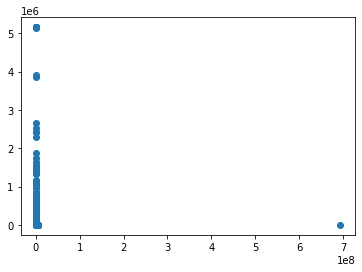

In [26]:
import matplotlib.pyplot as plt

plt.scatter(X_pca[:, 0], X_pca[:, 1])